<a href="https://colab.research.google.com/github/leandroboteon/linear-regression-sales-forecast/blob/main/Regressao_para_MKT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Regressão Linear: Avaliação de Investimentos em Marketing**

### Descrição do Projeto

Neste projeto, utilizando dados de uma empresa fictícia, nosso objetivo é desenvolver um modelo de regressão para estimar as vendas com base nos investimentos em plataformas de publicidade online como YouTube, Facebook e jornais. O projeto está organizado em seis etapas: Análise Exploratória de Dados (EDA), Pré-processamento de Dados (identificação e remoção de outliers, normalização com MinMaxScaler), Análise Estatística com Statsmodels, Construção do Modelo com Scikit-learn, Avaliação do Modelo, e Conclusão.

Através dessas etapas, trataremos os outliers e normalizaremos os dados para garantir precisão nas análises. Utilizaremos técnicas estatísticas para entender melhor as relações entre investimentos e vendas, e desenvolveremos um modelo de regressão preditivo. A avaliação do modelo será feita com métricas apropriadas, resultando em insights estratégicos para otimizar o retorno sobre o investimento em marketing.


In [61]:
# importando bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import statsmodels.formula.api as smf

## **1. Análise Exploratória de Dados (EDA)**

Nesta etapa, utilizamos as bibliotecas Pandas, Numpy, Matplotlib e Seaborn para importar, manipular e visualizar os dados. Aplicamos técnicas de visualização e análises estatísticas para identificar possíveis correlações entre as variáveis, proporcionando uma compreensão inicial dos dados e suas relações.

In [62]:
# importando o dataframe
df = pd.read_csv("/content/drive/MyDrive/Formação em Dados/Desafio 04/MKT.csv", sep=",")

In [63]:
df.head()

,youtube,facebook,newspaper,sales
0,84.72,19.20,48.96,12.60
1,351.48,33.96,51.84,25.68
2,135.48,20.88,46.32,14.28
3,116.64,1.80,36.00,11.52
4,318.72,24.00,0.36,20.88


In [64]:
# verificando o tipo dos dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   youtube    171 non-null    float64
 1   facebook   171 non-null    float64
 2   newspaper  171 non-null    float64
 3   sales      171 non-null    float64
dtypes: float64(4)
memory usage: 5.5 KB


In [65]:
df.describe()

,youtube,facebook,newspaper,sales
count,171.000000,171.000000,171.000000,171.000000
mean,178.021053,27.671579,35.240000,16.922807
std,102.449597,17.913532,24.902918,6.314608
min,0.840000,0.000000,0.360000,1.920000
25%,91.080000,11.700000,13.740000,12.540000
50%,179.760000,26.760000,31.080000,15.480000
75%,262.980000,43.680000,50.880000,20.820000
max,355.680000,59.520000,121.080000,32.400000


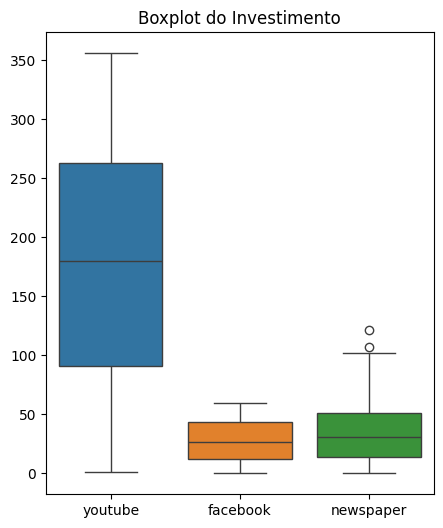

In [66]:
# boxplot para observar outliers

plt.figure(figsize=(5,6))
sns.boxplot(data=df[["youtube", "facebook", "newspaper"]])
plt.title("Boxplot do Investimento")
plt.show()

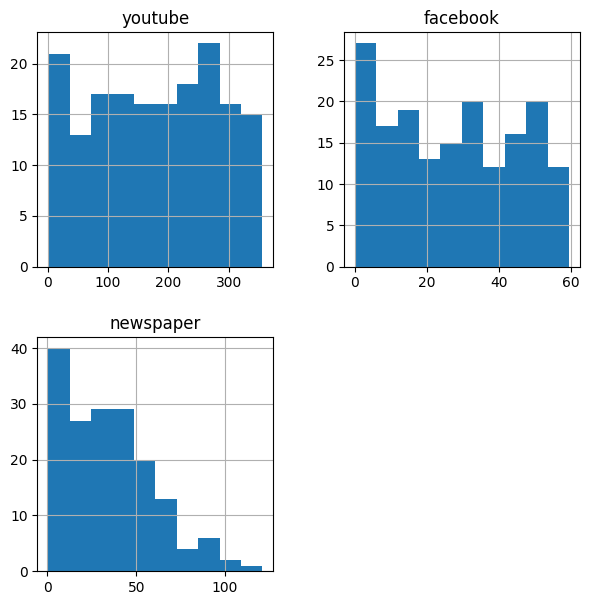

In [67]:
# histograma para observar distribuição dos investimentos nas 3 plataformas

df[["youtube", "facebook", "newspaper"]].hist(figsize=(7,7))
plt.show()

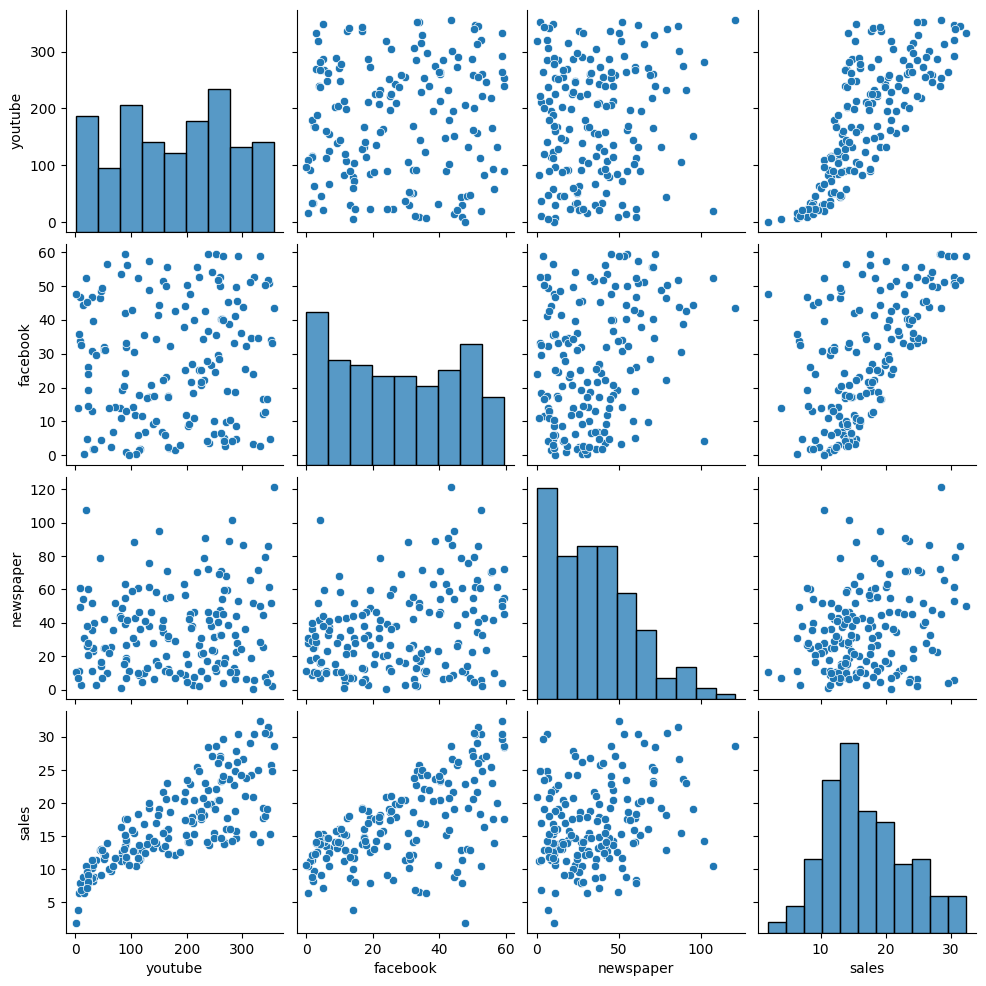

In [68]:
# observar as relações entre as variáveis
sns.pairplot(df)
plt.show()

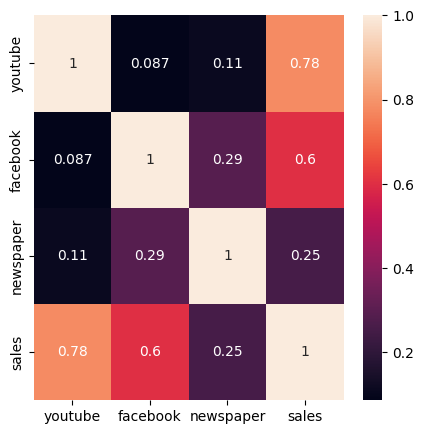

In [69]:
# heatmap de correlacão entre as variáveis
correlacao = df.corr()

plt.figure(figsize=(5,5))
sns.heatmap(correlacao, annot=True)
plt.show()

## **2. Pré-processamento de Dados**

### 2.1 Identificação e Remoção de Outliers

Analisando o boxplot, identificamos outliers nos investimentos em *newspaper*. Optamos por aplicar o método IQR para detectar e corrigir esses valores discrepantes, pois os dados não seguem uma distribuição normal, conforme evidenciado pelo histograma.

#### Identificação pelo método IQR

In [70]:
# Calcular Q1 e Q3
Q1 = df['newspaper'].quantile(0.25)
Q3 = df['newspaper'].quantile(0.75)

# Calcular o IQR
IQR = Q3 - Q1

# Calcular os limites para identificar os outliers
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

In [71]:
# Identificar os outliers
outliers = df[(df['newspaper'] < limite_inferior) | (df['newspaper'] > limite_superior)]

# Exibir os resultados
print(f"Q1: {Q1}")
print(f"Q3: {Q3}")
print(f"IQR: {IQR}")
print(f"Limite inferior: {limite_inferior}")
print(f"Limite superior: {limite_superior}")
print("Outliers na coluna 'newspaper':")
print(outliers)

Q1: 13.739999999999998
Q3: 50.879999999999995
IQR: 37.14
Limite inferior: -41.97
Limite superior: 106.59
Outliers na coluna 'newspaper':
    youtube  facebook  newspaper  sales
46    20.28     52.44     107.28  10.44
72   355.68     43.56     121.08  28.56


In [72]:
# Remover os outliers
df = df[(df['newspaper'] >= limite_inferior) & (df['newspaper'] <= limite_superior)]

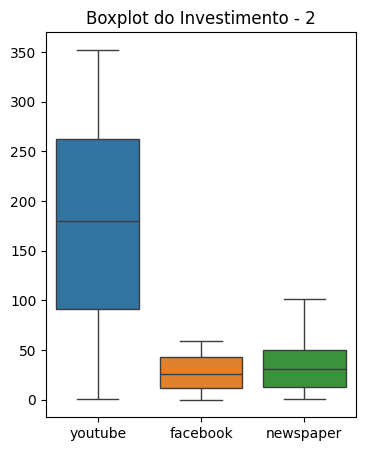

In [73]:
# boxplot_2 para observar a distribuição dos dados após a remoção dos outliers

plt.figure(figsize=(4,5))
sns.boxplot(data=df[["youtube", "facebook", "newspaper"]])
plt.title("Boxplot do Investimento - 2")
plt.show()

### 2.2 Normalização dos Dados utilizando MinMaxScaler

Nesta etapa, aplicamos o MinMaxScaler para normalizar os dados, garantindo que todas as variáveis estejam na mesma escala e, assim, melhorar o desempenho dos modelos preditivos.


In [74]:
scaler = MinMaxScaler()

df = pd.DataFrame(scaler.fit_transform(df), index=df.index, columns=df.columns)

In [75]:
df.head()

,youtube,facebook,newspaper,sales
0,0.238648,0.322581,0.479290,0.350394
1,0.997610,0.570565,0.507692,0.779528
2,0.383066,0.350806,0.453254,0.405512
3,0.329464,0.030242,0.351479,0.314961
4,0.904404,0.403226,0.000000,0.622047


## **3. Análise Estatística com `statsmodels`**

Utilizamos a biblioteca `statsmodels` para realizar uma análise estatística detalhada. Esta etapa nos permitiu compreender melhor as relações entre os investimentos em marketing e as vendas, avaliando a significância das variáveis independentes no modelo de regressão.


In [76]:
# Avaliando a significância das variáveis independentes no modelo de regressão.

function = "sales ~ youtube +	facebook	+ newspaper"

model = smf.ols(formula = function, data = df).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     499.8
Date:                Fri, 26 Jul 2024   Prob (F-statistic):           1.51e-82
Time:                        19:22:28   Log-Likelihood:                 223.29
No. Observations:                 169   AIC:                            -438.6
Df Residuals:                     165   BIC:                            -426.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0526      0.013      3.998      0.0

In [77]:
# Decidimos remover a variável `newspaper`, pois seu p-value está maior que 5%, indicando que não é estatisticamente significativa.

function = "sales ~ youtube + facebook"

model = smf.ols(formula = function, data = df).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     748.2
Date:                Fri, 26 Jul 2024   Prob (F-statistic):           8.87e-84
Time:                        19:22:28   Log-Likelihood:                 222.68
No. Observations:                 169   AIC:                            -439.4
Df Residuals:                     166   BIC:                            -430.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0577      0.012      4.695      0.0

## **4. Construção do Modelo**

Nesta etapa, definimos as variáveis independentes e dependente, dividimos em conjunto de treino e teste (70/30%) etreinamos o modelo de regressão linear.

In [78]:
# definindo as variáveis independentes (X) e dependentes (Y)

X = df[["youtube", "facebook"]] # Já com a variável 'newspaper' removida

Y = df["sales"]

In [79]:
# dividindo os dados em 70% treinamento e 30% teste
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.7, test_size=0.3, random_state=42)

In [80]:
# definindo a variável do modelo
lr = LinearRegression()

# treinando
lr.fit(X_train, Y_train)

LinearRegression()

In [81]:
# predições
Y_pred = lr.predict(X_test)

In [82]:
# criação de um dataframe chamado resultado com as colunas Real, Predito e Resíduo
resultado = pd.DataFrame()
resultado["Real"] = Y_test
resultado["Predito"] = Y_pred
resultado["Resíduo"] = resultado["Real"] - resultado["Predito"]
resultado.head()

,Real,Predito,Resíduo
140,0.527559,0.646954,-0.119395
30,0.661417,0.651470,0.009947
121,0.570866,0.664435,-0.093569
29,0.874016,0.797691,0.076325
145,0.389764,0.482947,-0.093184


## **5. Avaliação do Modelo**

Avaliação do desempenho do modelo de regressão linear utilizando métricas apropriadas para garantir sua robustez e precisão preditiva.

In [83]:
r2 = r2_score(Y_test, Y_pred)
print("R2: ", r2)

mae = mean_absolute_error(Y_test, Y_pred)
print("MAE: ", mae)

mse = mean_squared_error(Y_test, Y_pred)
print("MSE: ", mse)

rmse = np.sqrt(mse)
print("RMSE: ", rmse)

R2:  0.9147079634931836
MAE:  0.04768998219612751
MSE:  0.003424439911302479
RMSE:  0.05851871419727606


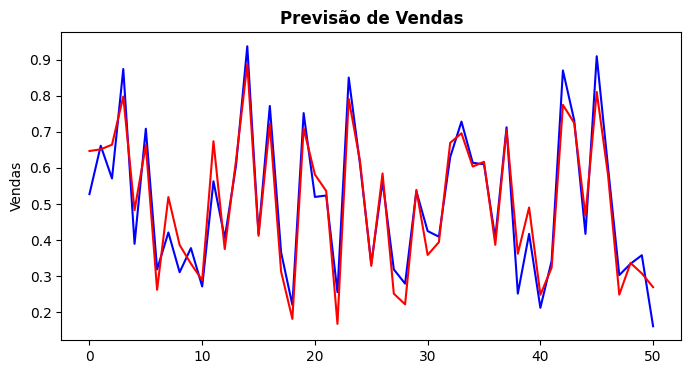

In [84]:
# comparando valores reais vs valores de predições

plt.figure(figsize=(8,4))
plt.plot(Y_test.values, color="blue")
plt.plot(Y_pred, color="red")
plt.title("Previsão de Vendas", fontweight="bold")
plt.ylabel("Vendas")
plt.show()

Text(0.5, 1.0, 'Previsão de Vendas')

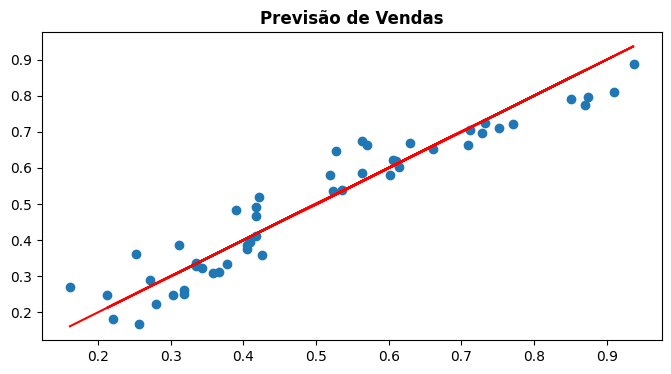

In [85]:
# comparando valores reais x valores de predição com gráfico de dispersão

plt.figure(figsize=(8,4))
plt.scatter(Y_test, Y_pred)
plt.plot(Y_test, Y_test, color="red")
plt.title("Previsão de Vendas", fontweight="bold")

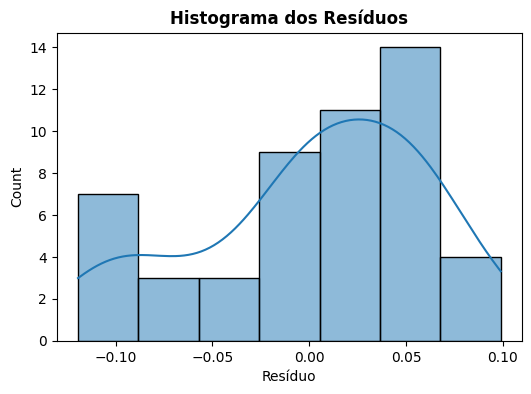

In [86]:
# histograma dos resíduos com linha de tendência

plt.figure(figsize=(6,4))
sns.histplot(resultado["Resíduo"], kde=True)
plt.title("Histograma dos Resíduos", fontweight="bold")
plt.show()

## **Conclusão**

Neste projeto, desenvolvemos um modelo de regressão linear para prever o valor de vendas com base em investimentos em marketing.

- Identificamos uma forte correlação entre a variável `youtube` e as vendas (`sales`), indicando que os investimentos nesta plataforma têm um impacto positivo nas vendas.
- A análise com `statsmodels` revelou que a variável `newspaper` não é estatisticamente significativa, com um p-value superior a 5%. Portanto, a removemos do modelo. As variáveis `youtube` e `facebook` mostraram-se mais relevantes para o aumento das vendas.
- As métricas de desempenho do modelo foram:
  - **R²**: 0.9147
  - **MAE**: 0.0477
  - **MSE**: 0.0034
  - **RMSE**: 0.0585

  Esses resultados demonstram um bom ajuste do modelo aos dados.
- Observando o gráfico de valores, notamos que o modelo prevê com boa precisão. O gráfico de dispersão entre valores reais e preditos mostra que os pontos estão próximos da linha ideal, e o histograma dos resíduos indica uma distribuição normal.